In [50]:
import numpy as np
import matplotlib.pyplot as plt


# Visualize the grid world
def plot_grid_world(grid_world, figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.imshow(1-grid_world, cmap='gray', interpolation='nearest')
    plt.title("Grid World")
    plt.xticks([])
    plt.yticks([])
    plt.show()


# Visualize the grid world, state value function, and policy
def plot_policy(grid_world, policy=None, figsize=(10,3), title="Policy"):
    plt.figure(figsize=figsize)
    
    if policy is not None:
        plt.imshow(1-grid_world, cmap='gray')
        n_x, n_y, n_a = policy.shape
        for i in range(n_x):
            for j in range(n_y):
                if grid_world[i, j] == 1 or grid_world[i, j] == 2:
                    continue
                if policy[i, j, 0] > 0:
                    plt.arrow(j, i,      0 * policy[i, j, 0], -0.5 * policy[i,j,0], head_width=0.1, head_length=0.1, fc='r', ec='r')
                if policy[i, j, 1] > 0:
                    plt.arrow(j, i,    0.5 * policy[i, j, 1],    0 * policy[i,j,1], head_width=0.1, head_length=0.1, fc='r', ec='r')
                if policy[i, j, 2] > 0:
                    plt.arrow(j, i,      0 * policy[i, j, 2], +0.5 * policy[i,j,2], head_width=0.1, head_length=0.1, fc='r', ec='r')
                if policy[i, j, 3] > 0:
                    plt.arrow(j, i,   -0.5 * policy[i, j, 3],    0 * policy[i,j,3], head_width=0.1, head_length=0.1, fc='r', ec='r')
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

    plt.show()

### MC control

In [ ]:
import numpy as np

def generate_episode():
    S = []
    A = []
    R = []
    T_max = 1000

    # Random initial state
    S.append([np.random.randint(4), np.random.randint(4)])

    if S[-1]!=[0,0] and S[-1]!=[3,3]:
        A.append(np.random.randint(4))
        R.append(-1)
    else:
        A.append(0)
        R.append(0)
    
    for t in range(T_max):
        if S[-1] == [0,0] or S[-1]==[3,3]:
            break
        elif A[-1] == 0:
            next_state = [max(0, S[-1][0]-1), S[-1][1]]
        elif A[-1] == 1:
            next_state = [S[-1][0], min(3, S[-1][1]+1)]
        elif A[-1] == 2:
            next_state = [min(3, S[-1][0]+1), S[-1][1]]
        elif A[-1] == 3:
            next_state = [S[-1][0], max(0, S[-1][1]-1)]
        
        S.append(next_state)

        if S[-1]!=[0,0] and S[-1]!=[3,3]:
            A.append(np.random.randint(4))
            R.append(-1)
        else:
            A.append(0)
            R.append(0)
    
    return S, A, R


In [ ]:
Q = np.zeros((4,4,4))
C = np.zeros((4,4,4))
policy = np.zeros((4,4), dtype=int)

# implement off-policy MC control

for n_episodes in range(1000):
    S, A, R = generate_episode()
    G = 0
    W = 1

    for t in range(len(S)-2, -1, -1):
        G = 1*G + R[t]
        C[S[t][0], S[t][1], A[t]] += W
        Q[S[t][0], S[t][1], A[t]] = Q[S[t][0], S[t][1], A[t]] + (W/C[S[t][0], S[t][1], A[t]]) * (G-Q[S[t][0], S[t][1], A[t]])
        policy[S[t][0], S[t][1]] = int(np.argmax(Q[S[t][0], S[t][1]]))
        if policy[S[t][0], S[t][1]] != A[t]:
            break
        W = W*4

print(policy)

# for n_episodes in range(1000000):
#     S, A, R = generate_episode()
#     # print(len(S))
#     G = 0
#     W = 1

#     for t in range(len(S)-2, -1, -1):
#         G = 1*G + R[t]
#         C[S[t][0], S[t][1], A[t]] += W
#         Q[S[t][0], S[t][1], A[t]] = Q[S[t][0], S[t][1], A[t]] + (W/C[S[t][0], S[t][1], A[t]]) * (G-Q[S[t][0], S[t][1], A[t]])
#         # print(Q[2, 2])
#         policy[S[t][0], S[t][1]] = int(np.argmax(Q[S[t][0], S[t][1]]))
#         if policy[S[t][0], S[t][1]] != A[t]:
#             break
#         W = W*4

# print(policy)
    

### Grid world with cliff

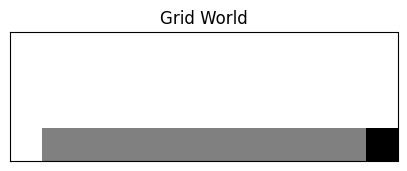

In [3]:
# Grid world with cliff                         4x12 Matrix
grid_world = np.zeros((4,12))
grid_world[3,11] = 2            # goal
grid_world[3,1:11] = 1          # cliff

plot_grid_world(grid_world)

### Tabular Sarsa

In [38]:
def Sarsa(step_size=0.9, epsilon=0.1, n_episodes=1000):
    # Initialize Q(s,a)
    Q = np.zeros((4,12,4))
    Q[3,11] = 10
    Q[3,1:11] = -100

    for n in range(n_episodes):
        # Fixed initial state
        S = [3,0]

        # Random initial state
        # S = [np.random.randint(4), np.random.randint(12)]

        # Choose A from S using policy derived from Q (epsilon-greedy)
        if np.random.rand() < epsilon:
            A = np.random.randint(4)
        else:
            A = np.argmax(Q[S[0], S[1]])
        
        # Repeat for each step of episode
        while S != [3,11]:
            # Take action A, observe R, S'

            if S[0] == 3 and 1 <= S[1] <= 10:
                S_next = [3,0]
                R = -100
            else:
                if A == 0:
                    S_next = [max(0, S[0]-1), S[1]]
                elif A == 1:
                    S_next = [S[0], min(11, S[1]+1)]
                elif A == 2:
                    S_next = [min(3, S[0]+1), S[1]]
                elif A == 3:
                    S_next = [S[0], max(0, S[1]-1)]
                R = -1

            # Choose A' from S' using policy derived from Q (epsilon-greedy)
            if np.random.rand() < epsilon:
                A_next = np.random.randint(4)
            else:
                A_next = np.argmax(Q[S_next[0], S_next[1]])
            
            # Q update
            Q[S[0], S[1], A] += step_size * (R + Q[S_next[0], S_next[1], A_next] - Q[S[0], S[1], A])

            S = S_next
            A = A_next
    
    return Q


def policy_from_Q(Q):
    policy = np.zeros((4,12,4))
    for i in range(4):
        for j in range(12):
            idx = np.argmax(Q[i,j])
            policy[i,j,idx] = 1
    return policy

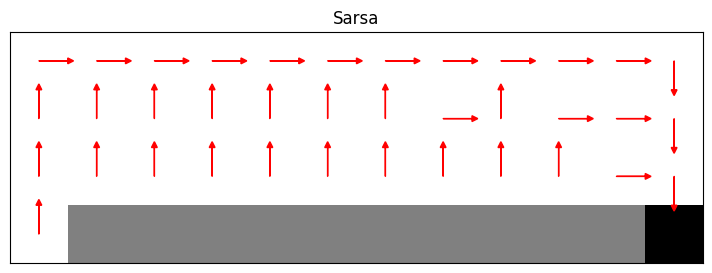

In [52]:
# Grid world with cliff                         4x12 Matrix
grid_world = np.zeros((4,12))
grid_world[3,11] = 2            # goal
grid_world[3,1:11] = 1          # cliff

Q = Sarsa(step_size=0.1, epsilon=0.25, n_episodes=10000)
policy = policy_from_Q(Q)

plot_policy(grid_world, policy, title="Sarsa")

### Tabular Q-learning

In [48]:
def Q_learning(step_size=0.9, epsilon=0.1, n_episodes=1000):
    # Initialize Q(s,a)
    Q = np.zeros((4,12,4))
    Q[3,11] = 10
    Q[3,1:11] = -100

    for n in range(n_episodes):
        # Initialize S
        S = [3,0]

        # Repeat for each step of episode
        while S != [3,11]:
            # Choose A from S using policy derived from Q (epsilon-greedy)
            if np.random.rand() < epsilon:
                A = np.random.randint(4)
            else:
                A = np.argmax(Q[S[0], S[1]])
            
            # Take action A, observe R, S'
            if S[0] == 3 and 1 <= S[1] <= 10:
                S_next = [3,0]
                R = -100
            else:
                if A == 0:
                    S_next = [max(0, S[0]-1), S[1]]
                elif A == 1:
                    S_next = [S[0], min(11, S[1]+1)]
                elif A == 2:
                    S_next = [min(3, S[0]+1), S[1]]
                elif A == 3:
                    S_next = [S[0], max(0, S[1]-1)]
                R = -1
            
            # Q update
            Q[S[0], S[1], A] += step_size * (R + np.max(Q[S_next[0], S_next[1]]) - Q[S[0], S[1], A])

            S = S_next

    return Q


def policy_from_Q(Q):
    policy = np.zeros((4,12,4))
    for i in range(4):
        for j in range(12):
            idx = np.argmax(Q[i,j])
            policy[i,j,idx] = 1
    return policy

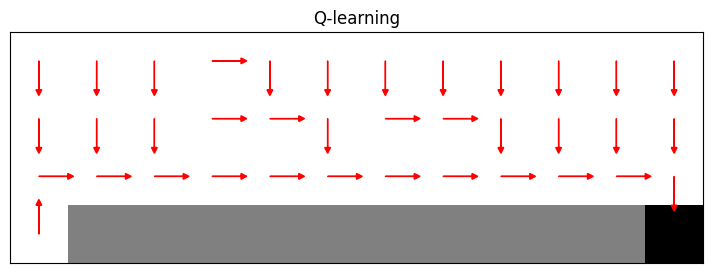

In [51]:
# Grid world with cliff                         4x12 Matrix
grid_world = np.zeros((4,12))
grid_world[3,11] = 2            # goal
grid_world[3,1:11] = 1          # cliff

Q = Q_learning(step_size=0.1, epsilon=0.25, n_episodes=10000)
policy = policy_from_Q(Q)
plot_policy(grid_world, policy, title="Q-learning")